In [1]:
import pandas as pd
import sqlite3

In [2]:
# Load CSV file into a pandas DataFrame
df = pd.read_csv('maryland_ozone_data.csv')

# Display first few rows of DataFrame to inspect data
print(df.head())


   Annual Count                    Date  Year  Aldino  Beltsville (CASTNET)  \
0             1  04/18/2016 12:00:00 AM  2016     NaN                   NaN   
1             2  04/19/2016 12:00:00 AM  2016     NaN                   NaN   
2             3  05/25/2016 12:00:00 AM  2016    77.0                  76.0   
3             4  05/26/2016 12:00:00 AM  2016    79.0                  72.0   
4             5  05/27/2016 12:00:00 AM  2016    73.0                   NaN   

   Blackwater NWR (CASTNET)  Calvert  Edgewood  Essex  Fair Hill  ...  \
0                       NaN      NaN       NaN    NaN        NaN  ...   
1                      74.0     74.0       NaN    NaN        NaN  ...   
2                       NaN      NaN      79.0   78.0       83.0  ...   
3                      76.0     75.0      80.0   81.0       76.0  ...   
4                       NaN      NaN       NaN    NaN        NaN  ...   

   Horn Point  HU-Beltsville  Millington  Padonia  PG Equestrian Center  \
0         N

In [3]:
# Connect to SQLite database (or create one if it doesn't exist)
conn = sqlite3.connect('maryland_ozone_data.db')

# Convert DataFrame to SQLite table
df.to_sql('ozone_data', conn, index=False, if_exists='replace')

# Commit and close connection
conn.commit()
conn.close()

print("Database created successfully.")


Database created successfully.


In [4]:
# Reconnect to SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')


In [5]:
# Example 1: Retrieve maximum ozone concentration for each monitoring location
query_max_concentration = """
SELECT
    MAX(`Aldino`) as Aldino_Max,
    MAX(`Beltsville (CASTNET)`) as Beltsville_Max,
    MAX(`Blackwater NWR (CASTNET)`) as Blackwater_Max
    -- Add other columns as needed
FROM ozone_data;
"""

max_concentration_result = pd.read_sql_query(query_max_concentration, conn)
print("\nMaximum Ozone Concentrations:")
print(max_concentration_result)



Maximum Ozone Concentrations:
   Aldino_Max  Beltsville_Max  Blackwater_Max
0        87.0            90.0            84.0


In [6]:
# Example 2: Find total number of exceedance days for each year
query_exceedance_count = """
SELECT
    Year,
    SUM(`Annual Count`) as Total_Exceedance_Days
FROM ozone_data
GROUP BY Year;
"""
exceedance_count_result = pd.read_sql_query(query_exceedance_count, conn)
print("\nExceedance Days Count by Year:")
print(exceedance_count_result)


Exceedance Days Count by Year:
   Year  Total_Exceedance_Days
0  2016                    351
1  2017                    148
2  2018                    141
3  2019                    105
4  2020                      6
5  2021                    153


In [9]:
# Example 3: Average concentration for each monitoring location
query_avg_concentration = """
SELECT
    'Aldino' as Location,
    AVG("Aldino") as Average_Concentration
FROM ozone_data
UNION
SELECT
    'Beltsville (CASTNET)' as Location,
    AVG("Beltsville (CASTNET)") as Average_Concentration
-- Add other UNION statements for other locations
;
"""

avg_concentration_result = pd.read_sql_query(query_avg_concentration, conn)
print("\nAverage Ozone Concentration by Location:")
print(avg_concentration_result)



Average Ozone Concentration by Location:
               Location  Average_Concentration
0                Aldino                   74.8
1  Beltsville (CASTNET)                    0.0


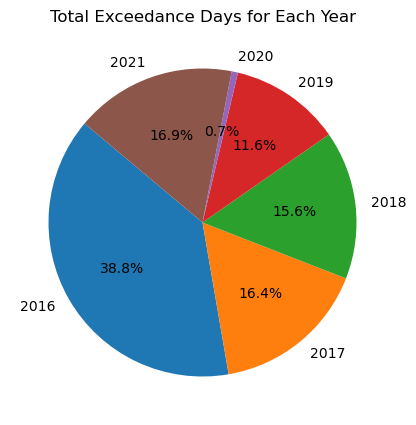

In [10]:
import matplotlib.pyplot as plt

# Plotting the pie chart
plt.figure(figsize=(5, 5))
plt.pie(exceedance_count_result['Total_Exceedance_Days'], labels=exceedance_count_result['Year'], autopct='%1.1f%%', startangle=140)
plt.title('Total Exceedance Days for Each Year')
plt.show()

# Close the connection
conn.close()


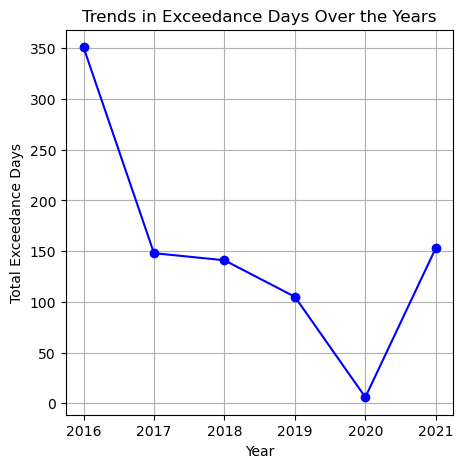

In [14]:

# Reconnect to the SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')

# Query to retrieve the total number of exceedance days for each year
query_exceedance_count = """
SELECT
    Year,
    SUM(`Annual Count`) as Total_Exceedance_Days
FROM ozone_data
GROUP BY Year;
"""

exceedance_count_result = pd.read_sql_query(query_exceedance_count, conn)

# Close the connection
conn.close()

# Plotting the line chart
plt.figure(figsize=(5, 5))
plt.plot(exceedance_count_result['Year'], exceedance_count_result['Total_Exceedance_Days'], marker='o', linestyle='-', color='b')
plt.title('Trends in Exceedance Days Over the Years')
plt.xlabel('Year')
plt.ylabel('Total Exceedance Days')
plt.grid(True)
plt.show()


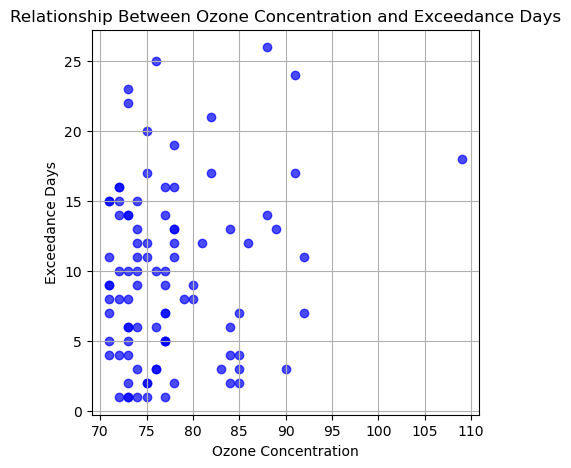

In [19]:

# Reconnect to the SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')

# Query to retrieve ozone concentration and exceedance days data
query_ozone_exceedance = """
SELECT
    `Year`,
    `Annual Count` as Exceedance_Days,
    `State-wide Max` as Ozone_Concentration
FROM ozone_data;
"""

ozone_exceedance_result = pd.read_sql_query(query_ozone_exceedance, conn)

# Close the connection
conn.close()

# Plotting the scatter plot
plt.figure(figsize=(5, 5))
plt.scatter(ozone_exceedance_result['Ozone_Concentration'], ozone_exceedance_result['Exceedance_Days'], color='b', alpha=0.7)
plt.title('Relationship Between Ozone Concentration and Exceedance Days')
plt.xlabel('Ozone Concentration')
plt.ylabel('Exceedance Days')
plt.grid(True)
plt.show()


C:\Users\pam86\AppData\Local\Temp\ipykernel_22068\4260568037.py:20: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ozone_time_series_result['Date'] = pd.to_datetime(ozone_time_series_result['Date'])


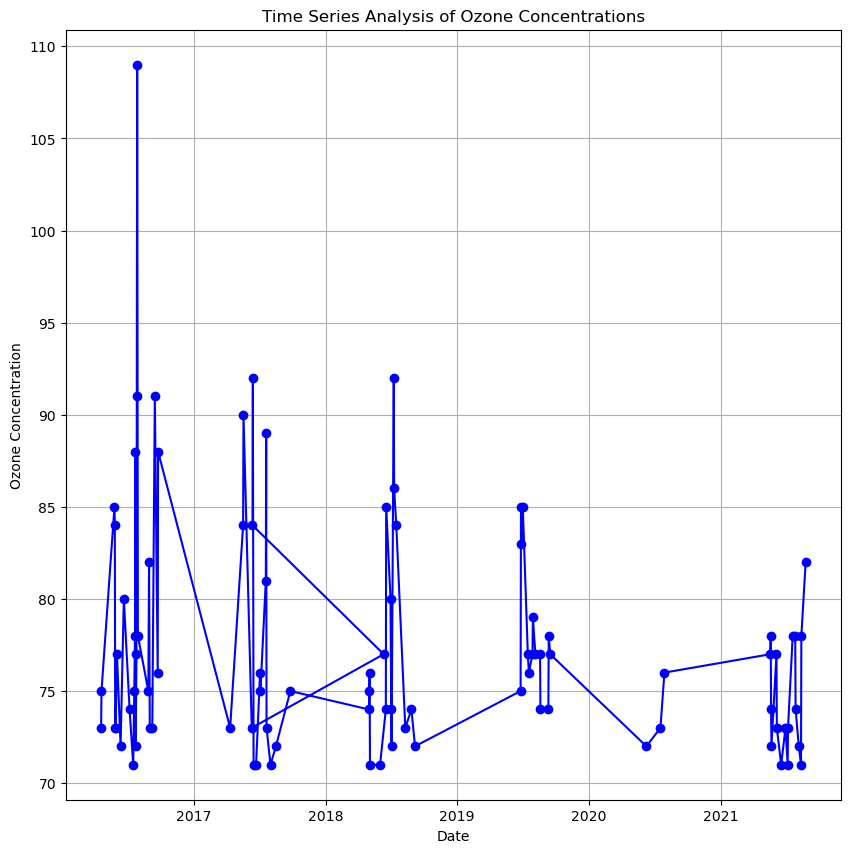

In [37]:
import seaborn as sns

# Reconnect to the SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')

# Query to retrieve ozone concentration data over time
query_ozone_time_series = """
SELECT
    `Date`,
    `State-wide Max` as Ozone_Concentration
FROM ozone_data;
"""

ozone_time_series_result = pd.read_sql_query(query_ozone_time_series, conn)

# Close the connection
conn.close()

# Convert 'Date' column to datetime format
ozone_time_series_result['Date'] = pd.to_datetime(ozone_time_series_result['Date'])

# Plotting the time series
plt.figure(figsize=(10, 10))
plt.plot(ozone_time_series_result['Date'], ozone_time_series_result['Ozone_Concentration'], marker='o', linestyle='-', color='b')
plt.title('Time Series Analysis of Ozone Concentrations')
plt.xlabel('Date')
plt.ylabel('Ozone Concentration')
plt.grid(True)
plt.show()


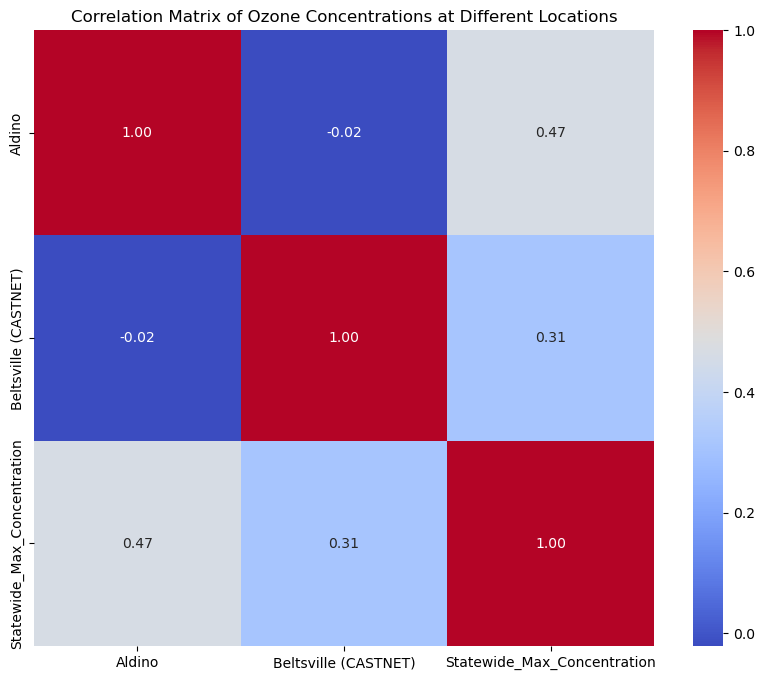

In [38]:
# Reconnect to the SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')

# Query to retrieve ozone concentration data for different monitoring locations
query_ozone_locations = """
SELECT
    `Aldino`,
    `Beltsville (CASTNET)`,
    -- Add other columns as needed
    `State-wide Max` as Statewide_Max_Concentration
FROM ozone_data;
"""

ozone_locations_result = pd.read_sql_query(query_ozone_locations, conn)

# Close the connection
conn.close()

# Calculate correlation matrix
correlation_matrix = ozone_locations_result.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Ozone Concentrations at Different Locations')
plt.show()


In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Reconnect to the SQLite database
conn = sqlite3.connect('maryland_ozone_data.db')

# Query to retrieve data for predictive modeling (e.g., Ozone Concentration vs. Exceedance Days)
query_predictive_model = """
SELECT
    `Exceedance_Days`,
    `State-wide Max` as Ozone_Concentration
FROM ozone_data;
"""

predictive_model_result = pd.read_sql_query(query_predictive_model, conn)

# Close the connection
conn.close()

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(predictive_model_result[['Exceedance_Days']], predictive_model_result['Ozone_Concentration'], test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Visualize the regression line
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test['Exceedance_Days'], y=y_test, color='blue')
plt.plot(X_test['Exceedance_Days'], y_pred, color='red', linewidth=2)
plt.title('Linear Regression: Ozone Concentration vs. Exceedance Days')
plt.xlabel('Exceedance Days')
plt.ylabel('Ozone Concentration')
plt.show()

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred, squared=False))


DatabaseError: Execution failed on sql '
SELECT
    `Exceedance_Days`,
    `State-wide Max` as Ozone_Concentration
FROM ozone_data;
': no such column: Exceedance_Days